In [550]:
# This is a simple Decision tree on time series data with weather predictions
# Using the package DecisionTreeClassifier from sklearn
# Loading all the packages
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
import numpy as np
import re
import datetime
import math

import matplotlib.pyplot as plt


In [551]:
#reading flight delayed csv
dataset = pd.read_csv('sample_data/Delay_Flight_Airport_Visibility_Cleaned.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [552]:
dataset.head()


,X,Origin.City,Date,Destination.IATA,Origin.IATA,Weekday,DepTime,CRSDepTime,ArrTime,UniqueCarrier,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin.Airport,Origin.State,Origin.Latitude,Origin.Longitude,Destination.Airport,Destination.City,Destination.State,Destination.Latitude,Destination.Longitude,Max.Temp,Min.Temp,visibility,Date.1,CommuteTime,CRSCommuteTime
1,2,Albuquerque,2008-01-10,PHX,ABQ,Thursday,20:02,19:35,21:11,WN,20:50,160,N409WN,69,75,55,21,27,328,6,8,21,0,0,0,0,Albuquerque International,NM,35.040222,-106.609194,Phoenix Sky Harbor International,Phoenix,AZ,33.434167,-112.008056,2.4,-36.4,4,2008-01-10,69,75
2,3,Albuquerque,2008-01-04,HOU,ABQ,Friday,19:31,18:45,22:25,WN,21:40,1925,N522SW,174,175,100,45,46,759,2,12,2,0,0,0,43,Albuquerque International,NM,35.040222,-106.609194,William P X,Houston,TX,29.645419,-95.278889,2.4,-36.4,4,2008-01-04,174,175
3,5,Albuquerque,2008-01-31,STL,ABQ,Thursday,10:52,10:40,14:10,WN,13:55,2546,N323SW,198,195,123,15,12,934,5,10,0,0,3,0,12,Albuquerque International,NM,35.040222,-106.609194,Lambert-St Louis International,St Louis,MO,38.747687,-90.359990,2.4,-36.4,4,2008-01-31,198,195
4,6,Albuquerque,2008-01-02,LBB,ABQ,Wednesday,16:00,15:30,17:49,WN,17:25,555,N512SW,109,115,43,24,30,289,2,4,1,0,0,0,23,Albuquerque International,NM,35.040222,-106.609194,Lubbock International,Lubbock,TX,33.663639,-101.822778,2.4,-36.4,4,2008-01-02,109,115
5,7,Albuquerque,2008-01-29,DFW,ABQ,Tuesday,18:12,17:30,20:40,AA,20:15,636,N298AA,148,165,73,25,42,569,8,7,0,0,0,0,25,Albuquerque International,NM,35.040222,-106.609194,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200,2.4,-36.4,4,2008-01-29,148,165


In [553]:
dataset['Date']

1         2008-01-10
2         2008-01-04
3         2008-01-31
4         2008-01-02
5         2008-01-29
             ...    
353449    2008-09-01
353450    2008-09-16
353451    2008-09-04
353452    2008-09-15
353453    2008-09-20
Name: Date, Length: 353453, dtype: object

In [554]:
def convertToFloat( data ):
  dataConverted = []

  for item in data:

    if type(item) == str:
      item = re.sub("−", "-", item)
    convertedVal = float(item)
    dataConverted.append(convertedVal)
  
  print(len(data))
  print(len(dataConverted))
  return dataConverted

In [555]:
def getMonth (dateInt):
  dataConverted = []
  index = 0
  
  for item in dateInt:
    # [hour, minute] = arrTime.iloc[index].split(":")
    # time = hour.rjust(2, '0') + minute.rjust(2, '0') 
    [year, month, day] = item.split("-")
    getMonth = int(month)
    # convertedVal = converteddate.toordinal()
    # convertedVal = getDateTime(int(month+day),arrTime.iloc[index])
    dataConverted.append(getMonth)
    # print(convertedVal + "-" + time + "-" + arrTime.iloc[index])
    
    index += 1
  
  return dataConverted

In [556]:
def getIntWeekDay (weekDay):
  weekday = weekDay.lower()
  if weekday == "sunday":
    return 1
  elif weekday == "monday":
    return 2
  elif weekday == "tuesday":
    return 3
  elif weekday == "wednesday":
    return 4
  elif weekday == "thursday":
    return 5
  elif weekday == "friday":
    return 6
  else:
    return 7

dataset["intWeekDay"] = list(map(getIntWeekDay, dataset['Weekday']))

In [557]:
print(datetime.date(2008, 1, 10).toordinal());

733051


In [558]:
dataset['Max.Temp'] = convertToFloat(dataset['Max.Temp'])
# max_temp = pd.DataFrame(max_temp)
# print(max_temp)
dataset['Min.Temp'] = convertToFloat(dataset['Min.Temp'])
dataset['Origin.Latitude'] = convertToFloat(dataset['Origin.Latitude'])
dataset['Origin.Longitude'] = convertToFloat(dataset['Origin.Longitude'])


dataset=dataset.dropna()

353453
353453
353453
353453
353453
353453
353453
353453


In [559]:

def getDateTime (dateInt, timeStr):
  groupHour = 4
  
  [hours, minutes] = timeStr.split(":")

  group = math.floor(int(hours or 0) / groupHour)
  return float(str(dateInt) + "." + str(group))


def convertTime( date, arrTime ):
  dataConverted = []
  index = 0
  
  for item in date:
    # [hour, minute] = arrTime.iloc[index].split(":")
    # time = hour.rjust(2, '0') + minute.rjust(2, '0') 
    [year, month, day] = item.split("-")
    convertedVal = datetime.date(int(year), int(month), int(day))
    convertedVal = getDateTime(convertedVal.toordinal(),arrTime.iloc[index])
    dataConverted.append(convertedVal)
    # print(convertedVal + "-" + time + "-" + arrTime.iloc[index])
    
    index += 1
  
  
  print(convertedVal)
  return dataConverted



 

In [560]:


def getTime (time):
  timearr = []
  index = 0
  for item in time: 
    h, m = time.iloc[index].split(":")
    #\ timestring = datetime.time(int(hours), int(minutes))
    timearr.append(int(datetime.timedelta(hours=int(h or 0),minutes=int(m)).total_seconds()))

    # timearr.append(int(hours * 3600 + minutes * 60) )
    index += 1
  return timearr

  



In [561]:
dataset['DateTimeOrdinal'] = getMonth(dataset['Date'])
dataset['CRSArrTime'] = getTime(dataset['CRSArrTime'])
dataset['DepTime'] = getTime(dataset['DepTime'])

dataset['CRSDepTime'] = getTime(dataset['CRSDepTime'])

In [562]:
dataset['Month'] = getMonth(dataset['Date'])


In [563]:
dataset.head()

,X,Origin.City,Date,Destination.IATA,Origin.IATA,Weekday,DepTime,CRSDepTime,ArrTime,UniqueCarrier,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin.Airport,Origin.State,Origin.Latitude,Origin.Longitude,Destination.Airport,Destination.City,Destination.State,Destination.Latitude,Destination.Longitude,Max.Temp,Min.Temp,visibility,Date.1,CommuteTime,CRSCommuteTime,intWeekDay,DateTimeOrdinal,Month
1,2,Albuquerque,2008-01-10,PHX,ABQ,Thursday,72120,70500,21:11,WN,75000,160,N409WN,69,75,55,21,27,328,6,8,21,0,0,0,0,Albuquerque International,NM,35.040222,-106.609194,Phoenix Sky Harbor International,Phoenix,AZ,33.434167,-112.008056,2.4,-36.4,4,2008-01-10,69,75,5,1,1
2,3,Albuquerque,2008-01-04,HOU,ABQ,Friday,70260,67500,22:25,WN,78000,1925,N522SW,174,175,100,45,46,759,2,12,2,0,0,0,43,Albuquerque International,NM,35.040222,-106.609194,William P X,Houston,TX,29.645419,-95.278889,2.4,-36.4,4,2008-01-04,174,175,6,1,1
3,5,Albuquerque,2008-01-31,STL,ABQ,Thursday,39120,38400,14:10,WN,50100,2546,N323SW,198,195,123,15,12,934,5,10,0,0,3,0,12,Albuquerque International,NM,35.040222,-106.609194,Lambert-St Louis International,St Louis,MO,38.747687,-90.359990,2.4,-36.4,4,2008-01-31,198,195,5,1,1
4,6,Albuquerque,2008-01-02,LBB,ABQ,Wednesday,57600,55800,17:49,WN,62700,555,N512SW,109,115,43,24,30,289,2,4,1,0,0,0,23,Albuquerque International,NM,35.040222,-106.609194,Lubbock International,Lubbock,TX,33.663639,-101.822778,2.4,-36.4,4,2008-01-02,109,115,4,1,1
5,7,Albuquerque,2008-01-29,DFW,ABQ,Tuesday,65520,63000,20:40,AA,72900,636,N298AA,148,165,73,25,42,569,8,7,0,0,0,0,25,Albuquerque International,NM,35.040222,-106.609194,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200,2.4,-36.4,4,2008-01-29,148,165,3,1,1


In [564]:
X = dataset[feature_cols] # Features
feature_cols = ['DateTimeOrdinal','Month','intWeekDay','CRSElapsedTime','CRSArrTime','visibility','Min.Temp','DepTime','AirTime','CRSDepTime']

In [565]:
dataset['status'] = np.where((dataset['ArrDelay'] < 45) , 'slightly delayed', 'extremely delayed')
y = dataset['status'] # Target variable

In [566]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [567]:
dataset.head()

,X,Origin.City,Date,Destination.IATA,Origin.IATA,Weekday,DepTime,CRSDepTime,ArrTime,UniqueCarrier,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin.Airport,Origin.State,Origin.Latitude,Origin.Longitude,Destination.Airport,Destination.City,Destination.State,Destination.Latitude,Destination.Longitude,Max.Temp,Min.Temp,visibility,Date.1,CommuteTime,CRSCommuteTime,intWeekDay,DateTimeOrdinal,Month,status
1,2,Albuquerque,2008-01-10,PHX,ABQ,Thursday,72120,70500,21:11,WN,75000,160,N409WN,69,75,55,21,27,328,6,8,21,0,0,0,0,Albuquerque International,NM,35.040222,-106.609194,Phoenix Sky Harbor International,Phoenix,AZ,33.434167,-112.008056,2.4,-36.4,4,2008-01-10,69,75,5,1,1,slightly delayed
2,3,Albuquerque,2008-01-04,HOU,ABQ,Friday,70260,67500,22:25,WN,78000,1925,N522SW,174,175,100,45,46,759,2,12,2,0,0,0,43,Albuquerque International,NM,35.040222,-106.609194,William P X,Houston,TX,29.645419,-95.278889,2.4,-36.4,4,2008-01-04,174,175,6,1,1,extremely delayed
3,5,Albuquerque,2008-01-31,STL,ABQ,Thursday,39120,38400,14:10,WN,50100,2546,N323SW,198,195,123,15,12,934,5,10,0,0,3,0,12,Albuquerque International,NM,35.040222,-106.609194,Lambert-St Louis International,St Louis,MO,38.747687,-90.359990,2.4,-36.4,4,2008-01-31,198,195,5,1,1,slightly delayed
4,6,Albuquerque,2008-01-02,LBB,ABQ,Wednesday,57600,55800,17:49,WN,62700,555,N512SW,109,115,43,24,30,289,2,4,1,0,0,0,23,Albuquerque International,NM,35.040222,-106.609194,Lubbock International,Lubbock,TX,33.663639,-101.822778,2.4,-36.4,4,2008-01-02,109,115,4,1,1,slightly delayed
5,7,Albuquerque,2008-01-29,DFW,ABQ,Tuesday,65520,63000,20:40,AA,72900,636,N298AA,148,165,73,25,42,569,8,7,0,0,0,0,25,Albuquerque International,NM,35.040222,-106.609194,Dallas-Fort Worth International,Dallas-Fort Worth,TX,32.895951,-97.037200,2.4,-36.4,4,2008-01-29,148,165,3,1,1,slightly delayed


In [568]:
print ("\nNull Vlaues    =",dataset.isnull().sum().values.sum())
print ("\nNa Vlaues    =",dataset.isna().sum().values.sum())



Null Vlaues    = 0

Na Vlaues    = 0


*Building Decision Tree Model*

In [569]:

#Let's create a Decision Tree Model using Scikit-learn.
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)


[[42720  8865]
 [ 9539 44912]]


In [570]:
clf.score(X_test, y_test)


0.8264363046512505

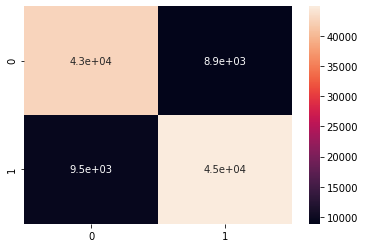

In [571]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

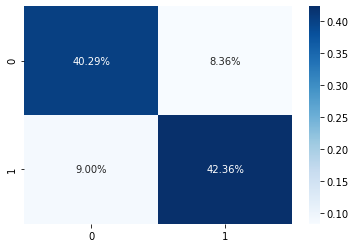

In [572]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [573]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8264363046512505


In [574]:
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 

F1 Score:  0.8263621020814245
Precision Score:  0.8263097111681965
Recall Score:  0.8264813443091301


*Visualizing Decision Trees
You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.*



In [575]:
pip install graphviz

In [576]:
pip install pydotplus


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['slightly delayed', 'extremely delayed'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('flightDelays.png')
Image(graph.create_png())


In [ ]:
graph.write_pdf("flightDelays.pdf")

True